# Welcome
---

1. **Title**
   - Three Generations Seeking Romance - Regression & Classification

2. **Introduction**
   - Project objectives and scope
   - Information about the dataset used

3. **Data Loading and Preprocessing**
   - Loading necessary libraries
     ```python
     import pandas as pd
     import numpy as np
     import warnings
     warnings.filterwarnings("ignore")
     pd.set_option("display.max_columns", 100)
     ```
   - Loading the dataset
   - Initial examination of the dataset (head, info, describe)
   - Checking and handling missing data
   - Data cleaning (e.g., removing punctuation, fixing extra spaces)

4. **Data Exploration and Visualization**
   - Basic statistical analyses
   - Visualizing data distributions (histogram, boxplot)
   - Visualizing income distribution by gender (bar plot)

5. **Feature Engineering**
   - Creating new features
   - Encoding categorical variables (one-hot encoding)
   - Scaling features (normalization, standardization)

6. **Modeling**
   - Splitting data into training and testing sets
   - Selecting and defining models
     ```python
     from sklearn.linear_model import LogisticRegression
     from sklearn.neighbors import KNeighborsClassifier
     from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
     from sklearn.svm import SVC
     from sklearn.naive_bayes import GaussianNB
     from sklearn.tree import DecisionTreeClassifier
     ```
   - Training the models
   - Evaluating the models (accuracy, precision, recall, F1-score)

7. **Evaluation of Model Performance**
   - Checking for overfitting and underfitting
   - Optimizing hyperparameters for model improvement

8. **Results and Discussion**
   - Final model performance
   - Interpretation of the results obtained
   - Future improvements and work

---


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(x, y):
    # Bütün modelleri tanımlıyorum
    log_reg = LogisticRegression()
    knn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gbdt = GradientBoostingClassifier()
    svc = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    mlp = MLPClassifier()

    algos = [log_reg, knn, rf, ada, gbdt, svc, nb, dt, mlp]
    algo_names = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 
                   'SVC', 'Naive Bayes', 'Decision Tree', 'MLP']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    feature_importances = pd.DataFrame()
    
    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=algo_names)
    
    for algo, name in zip(algos, algo_names):
        model = algo.fit(x_train, y_train)
        p = model.predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        precision.append(precision_score(y_test, p, average='weighted'))
        recall.append(recall_score(y_test, p, average='weighted'))
        f1.append(f1_score(y_test, p, average='weighted'))
        
        # Feature importance hesaplama
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            feature_importances[name] = importance
    
    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1_Score = f1
    
    # Oluşturduğum result tablosunu doğruluk oranına (accuracy) göre sıralayıp dönüyor
    rtable = result.sort_values('Accuracy', ascending=False)
    
    return rtable, feature_importances


from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

def algo_test(x, y):
    # Modeller ve parametreler
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBRegressor': XGBRegressor(),
        'SVR': SVR(),
        'MLP Regressor': MLPRegressor(),
    }

    params = {
        'Ridge': {'alpha': [0.1, 1, 10]},
        'Lasso': {'alpha': [0.1, 1, 10]},
        'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
        'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'KNeighborsRegressor': {'n_neighbors': [3, 5, 7]},
        'Decision Tree': {'max_depth': [None, 10, 20]},
        'XGBRegressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
        'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    best_results = []

    for name, model in models.items():
        grid = GridSearchCV(model, params[name], scoring='r2', cv=5)
        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_
        predictions = best_model.predict(x_test)

        best_results.append({
            'Model': name,
            'Best Params': grid.best_params_,
            'R_Squared': r2_score(y_test, predictions),
            'RMSE': mean_squared_error(y_test, predictions) ** 0.5,
            'MAE': mean_absolute_error(y_test, predictions)
        })

    result_df = pd.DataFrame(best_results).sort_values('R_Squared', ascending=False).reset_index(drop=True)

    return result_df




# Data import

In [2]:
df = df = pd.read_csv('profiles.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

# EDA

In [3]:
df = df.drop_duplicates()
# some columns are duplicated, we need to remove them

In [4]:
#is there any other unnecessary row
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9515 entries, 0 to 9514
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job        

In [5]:
df = df.dropna(subset=['age'])
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

In [7]:
df.age.value_counts(), df.age.describe()

(age
 26.0     601
 27.0     593
 25.0     591
 28.0     557
 24.0     539
 29.0     536
 30.0     476
 31.0     459
 23.0     429
 32.0     412
 33.0     323
 22.0     320
 34.0     295
 35.0     262
 37.0     237
 36.0     226
 21.0     207
 38.0     204
 39.0     178
 40.0     176
 42.0     161
 20.0     156
 41.0     153
 43.0     136
 19.0     113
 44.0     104
 45.0      99
 46.0      86
 47.0      81
 49.0      71
 48.0      68
 18.0      58
 50.0      58
 52.0      55
 51.0      51
 57.0      43
 56.0      39
 59.0      39
 53.0      38
 55.0      36
 54.0      34
 58.0      31
 60.0      29
 63.0      26
 61.0      25
 66.0      21
 62.0      20
 65.0      20
 64.0      16
 68.0      12
 67.0       8
 69.0       5
 110.0      1
 Name: count, dtype: int64,
 count    9514.000000
 mean       32.084192
 std         9.445488
 min        18.000000
 25%        25.000000
 50%        30.000000
 75%        36.000000
 max       110.000000
 Name: age, dtype: float64)

## Essays are removed

In [8]:
df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   ethnicity    8565 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          8183 non-null   object 
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    3886 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         6352 non-null   object 
 15  religion     6261 non-null   object 
 16  sex          9514 non-null   object 
 17  sign         7776 non-null   object 
 18  smokes       8596 non-null   object 
 19  speaks

In [10]:
df.isnull().sum().sort_values(ascending=False)

offspring      5628
diet           3753
religion       3253
pets           3162
drugs          2299
sign           1738
job            1331
education      1055
ethnicity       949
smokes          918
body_type       848
drinks          502
speaks            6
age               0
sex               0
last_online       0
orientation       0
location          0
income            0
height            0
status            0
dtype: int64

# Missing values

In [11]:
missing_columns = df.columns[df.isnull().any()]
missing_columns
#offspring column has too missing values, we can drop it
missing_columns = missing_columns.drop('offspring')

In [12]:
for c in missing_columns:
    #frequency 
    df[c] = df[c].fillna(pd.Series(np.random.choice(df[c].dropna().value_counts().index, size=df[c].isnull().sum(), p=df[c].dropna().value_counts(normalize=True)), index=df[df[c].isnull()].index))
df.isnull().sum().sort_values(ascending=False)

offspring      5628
age               0
location          0
speaks            0
smokes            0
sign              0
sex               0
religion          0
pets              0
orientation       0
last_online       0
body_type         0
job               0
income            0
height            0
ethnicity         0
education         0
drugs             0
drinks            0
diet              0
status            0
dtype: int64

# Feature Engineering

## offspring

In [13]:
df["kid"] = df["offspring"].str.contains("has", na=False).astype(int)

In [14]:
del df["offspring"]

In [15]:
df.isnull().sum().sort_values(ascending=False)

age            0
location       0
status         0
speaks         0
smokes         0
sign           0
sex            0
religion       0
pets           0
orientation    0
last_online    0
body_type      0
job            0
income         0
height         0
ethnicity      0
education      0
drugs          0
drinks         0
diet           0
kid            0
dtype: int64

## diet

In [16]:
df.diet.value_counts(normalize=True), df.diet.isnull().sum(), df.diet.unique()

(diet
 mostly anything        0.451545
 anything               0.187093
 strictly anything      0.144314
 mostly vegetarian      0.098276
 mostly other           0.029641
 strictly vegetarian    0.024280
 vegetarian             0.020496
 strictly other         0.010931
 mostly vegan           0.009880
 other                  0.008619
 strictly vegan         0.006201
 vegan                  0.003469
 mostly halal           0.001997
 mostly kosher          0.001892
 strictly halal         0.000631
 strictly kosher        0.000420
 kosher                 0.000210
 halal                  0.000105
 Name: proportion, dtype: float64,
 0,
 array(['strictly anything', 'mostly other', 'anything', 'vegetarian',
        'mostly anything', 'strictly other', 'strictly vegetarian',
        'mostly vegetarian', 'strictly vegan', 'other', 'mostly vegan',
        'mostly halal', 'vegan', 'mostly kosher', 'strictly halal',
        'halal', 'strictly kosher', 'kosher'], dtype=object))

In [17]:
df.loc[(df.diet.isnull()) & (df.drinks == 'not at all'), 'diet'] = 'halal'
df['diet'] = df['diet'].replace({
    'strictly anything': 'Anything',
    'mostly anything': 'Anything',
    'anything': 'Anything',
    'strictly vegan': 'Vegan',
    'mostly vegan': 'Vegan',
    'vegan': 'Vegan',
    'strictly vegetarian': 'Vegetarian',
    'mostly vegetarian': 'Vegetarian',
    'vegetarian': 'Vegetarian',
    'strictly other': 'Other',
    'mostly other': 'Other',
    'other': 'Other',
    'strictly halal': 'Halal',
    'mostly halal': 'Halal',
    'halal': 'Halal',
    'strictly kosher': 'Kosher',
    'mostly kosher': 'Kosher',
    'kosher': 'Kosher'
})

In [18]:
df.diet.value_counts(normalize=True), df.diet.isnull().sum(), df.diet.unique()

(diet
 Anything      0.782951
 Vegetarian    0.143052
 Other         0.049191
 Vegan         0.019550
 Halal         0.002733
 Kosher        0.002523
 Name: proportion, dtype: float64,
 0,
 array(['Anything', 'Other', 'Vegetarian', 'Vegan', 'Halal', 'Kosher'],
       dtype=object))

## religion

In [19]:
df.religion.value_counts(normalize=True), df.religion.isnull().sum(), df.religion.unique()

(religion
 agnosticism                                   0.071474
 other                                         0.065903
 agnosticism but not too serious about it      0.064957
 agnosticism and laughing about it             0.061593
 catholicism but not too serious about it      0.059386
 atheism                                       0.058335
 other and laughing about it                   0.053605
 atheism and laughing about it                 0.051503
 christianity but not too serious about it     0.050872
 christianity                                  0.048140
 judaism but not too serious about it          0.037839
 other but not too serious about it            0.036998
 atheism but not too serious about it          0.032373
 catholicism                                   0.027118
 atheism and somewhat serious about it         0.022283
 other and somewhat serious about it           0.020496
 christianity and somewhat serious about it    0.020286
 catholicism and laughing about it    

In [20]:
religions = ['agnosticism', 'atheism', 'christianity', 'buddhism', 'judaism', 'hinduism', 'islam', 'other','catholicism']
# Define the seriousness map
seriousness_map = {
    'very serious about it': 4,
    'somewhat serious about it': 3,
    'not too serious about it': 2,
    'laughing about it': 1
}

# Update the 'religion' column to remove text after the religion type
def extract_religion(x):
    for religion in religions:
        if x.startswith(religion):
            return religion
    return x

df['religion'] = df['religion'].apply(extract_religion)

# Update the 'religion_seriousness' column to keep the seriousness level
df['religion_seriousness'] = df['religion'].apply(lambda x: 
                                                  seriousness_map[x.split(' and ')[-1]] if 'and' in x 
                                                  else seriousness_map[x.split(' but ')[-1]] if 'but' in x 
                                                  else 3)


In [21]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
8389,32.0,fit,Vegetarian,socially,never,graduated from college/university,indian,70.0,-1.0,banking / financial / real estate,2012-06-30-05-40,"san francisco, california",straight,likes dogs and dislikes cats,other,m,aquarius,no,"english (fluently), hindi (fluently)",single,0,3


## Body Type

* Dummy

In [22]:
df.body_type.value_counts(normalize=True), df.body_type.isnull().sum(), df.body_type.unique()

(body_type
 average           0.260038
 fit               0.233551
 athletic          0.222409
 thin              0.085873
 curvy             0.070528
 a little extra    0.050872
 skinny            0.030061
 full figured      0.021968
 overweight        0.008304
 jacked            0.007358
 used up           0.005045
 rather not say    0.003994
 Name: proportion, dtype: float64,
 0,
 array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'skinny',
        'curvy', 'full figured', 'jacked', 'rather not say', 'used up',
        'overweight'], dtype=object))

In [23]:
df.body_type.replace({
    'overweight': "overweight",
    'full figured': "curvy",
    'a little extra': "overweight",
    'curvy': "curvy",
    'average': "average",
    'fit': "fit",
    'athletic': "fit",
    'thin': "thin",
    'skinny': "thin",
    'jacked': "average",
    'used up': "other",
    'rather not say': "other"
}, inplace=True)
df.body_type.value_counts(normalize=True), df.body_type.isnull().sum(), df.body_type.unique()

(body_type
 fit           0.455960
 average       0.267395
 thin          0.115934
 curvy         0.092495
 overweight    0.059176
 other         0.009039
 Name: proportion, dtype: float64,
 0,
 array(['overweight', 'average', 'thin', 'fit', 'curvy', 'other'],
       dtype=object))

In [24]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
9364,50.0,overweight,Anything,socially,never,graduated from college/university,white,65.0,-1.0,executive / management,2012-01-02-21-51,"lafayette, california",gay,has dogs and has cats,other,f,capricorn and it&rsquo;s fun to think about,no,english,single,1,3


## Drinks 

* onehot

In [25]:
df.drinks.value_counts(normalize=True), df.drinks.isnull().sum(), df.drinks.unique()

(drinks
 socially       0.740698
 rarely         0.100589
 often          0.090078
 not at all     0.056758
 very often     0.006412
 desperately    0.005466
 Name: proportion, dtype: float64,
 0,
 array(['socially', 'often', 'not at all', 'rarely', 'very often',
        'desperately'], dtype=object))

In [26]:
# encode with risen values
df.drinks.replace({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 4}, inplace=True)

In [27]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
6850,27.0,average,Anything,2,never,graduated from college/university,white,72.0,40000.0,construction / craftsmanship,2012-06-30-00-40,"san leandro, california",straight,has dogs and likes cats,atheism,m,scorpio but it doesn&rsquo;t matter,no,english,single,0,3


## Drugs

* onehot

In [28]:
df.drugs.value_counts(normalize=True), df.drugs.isnull().sum(), df.drugs.unique()

(drugs
 never        0.827097
 sometimes    0.164494
 often        0.008409
 Name: proportion, dtype: float64,
 0,
 array(['never', 'sometimes', 'often'], dtype=object))

In [29]:
df.replace({'drugs': {'never': 0, 'sometimes': 1, 'often': 2}}, inplace=True)

In [30]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
4485,25.0,average,Anything,2,0,graduated from college/university,white,76.0,-1.0,banking / financial / real estate,2012-06-29-23-10,"san francisco, california",straight,likes dogs and likes cats,judaism,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single,0,3


## Education

In [31]:
df.education.value_counts(normalize=True), df.education.isnull().sum(), df.education.unique()

(education
 graduated from college/university    0.447236
 graduated from masters program       0.164705
 working on college/university        0.114568
 working on masters program           0.029956
 graduated from two-year college      0.029535
 graduated from high school           0.024175
 graduated from ph.d program          0.023965
 graduated from law school            0.020601
 working on two-year college          0.018919
 working on ph.d program              0.018709
 dropped out of college/university    0.016817
 college/university                   0.015976
 graduated from space camp            0.012193
 dropped out of space camp            0.010196
 working on space camp                0.009039
 graduated from med school            0.008934
 working on law school                0.006201
 two-year college                     0.004940
 working on med school                0.004835
 dropped out of two-year college      0.003889
 masters program                      0.002417
 w

In [32]:
df['education'] = df['education'].replace({
    'working on college/university': 'Working on Education',
    'working on space camp': 'Working on Education',
    'graduated from masters program': 'Graduated',
    'graduated from college/university': 'Graduated',
    'working on two-year college': 'Working on Education',
    'graduated from high school': 'Graduated',
    'working on masters program': 'Working on Education',
    'graduated from space camp': 'Graduated',
    'college/university': 'Graduated',
    'dropped out of space camp': 'Dropped out of Education',
    'graduated from ph.d program': 'Graduated',
    'graduated from law school': 'Graduated',
    'working on ph.d program': 'Working on Education',
    'two-year college': 'Graduated',
    'graduated from two-year college': 'Graduated',
    'working on med school': 'Working on Education',
    'dropped out of college/university': 'Dropped out of Education',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'dropped out of high school': 'Dropped out of Education',
    'working on high school': 'Working on Education',
    'masters program': 'Graduated',
    'dropped out of ph.d program': 'Dropped out of Education',
    'dropped out of two-year college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'high school': 'Graduated',
    'working on law school': 'Working on Education',
    'law school': 'Graduated',
    'dropped out of masters program': 'Dropped out of Education',
    'ph.d program': 'Graduated',
    'dropped out of law school': 'Dropped out of Education'
})
df.education.value_counts(normalize=True), df.education.isnull().sum(), df.education.unique()

(education
 Graduated                   0.758671
 Working on Education        0.204541
 Dropped out of Education    0.036788
 Name: proportion, dtype: float64,
 0,
 array(['Working on Education', 'Graduated', 'Dropped out of Education'],
       dtype=object))

In [33]:
df.sample()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
6657,29.0,fit,Anything,2,1,Dropped out of Education,white,80.0,100000.0,science / tech / engineering,2012-06-27-22-57,"san francisco, california",straight,likes dogs and likes cats,other,m,cancer but it doesn&rsquo;t matter,no,"english (okay), lisp (fluently)",single,0,3


## Ethnicity

* 112 different type input

In [34]:
df.ethnicity.value_counts(normalize=True), df.ethnicity.isnull().sum() , df.ethnicity.unique()

(ethnicity
 white                                                     0.613412
 asian                                                     0.101640
 hispanic / latin                                          0.050242
 black                                                     0.038995
 other                                                     0.037103
                                                             ...   
 asian, middle eastern, indian                             0.000105
 asian, middle eastern, white                              0.000105
 asian, black, native american, hispanic / latin, white    0.000105
 middle eastern, indian, other                             0.000105
 middle eastern, hispanic / latin, white, other            0.000105
 Name: proportion, Length: 112, dtype: float64,
 0,
 array(['asian, white', 'white', 'asian, black, other', 'white, other',
        'hispanic / latin, white', 'hispanic / latin',
        'pacific islander, white', 'asian', 'black, white',
  

In [35]:
import re
eth = " ".join(df.ethnicity.dropna())
# delete punctuation
eth = re.sub(r'[^\w\s]', '', eth)

eth = eth.split()
from collections import Counter
eth = dict(Counter(eth))
eth

{'asian': 1283,
 'white': 6723,
 'black': 609,
 'other': 675,
 'hispanic': 907,
 'latin': 907,
 'pacific': 222,
 'islander': 222,
 'native': 214,
 'american': 214,
 'middle': 173,
 'eastern': 173,
 'indian': 274}

* Define a function to remove punctuation from a string.
* Apply this function to the ethnicity column of the DataFrame.

In [36]:
# Function to remove punctuation from a string
import string 
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'ethnicity' column
df['ethnicity'] = df['ethnicity'].apply(remove_punctuation)


In [37]:
df.ethnicity.value_counts(normalize=True), df.ethnicity.isnull().sum() , df.ethnicity.unique()

(ethnicity
 white                                                0.613412
 asian                                                0.101640
 hispanic  latin                                      0.050242
 black                                                0.038995
 other                                                0.037103
                                                        ...   
 asian middle eastern indian                          0.000105
 asian middle eastern white                           0.000105
 asian black native american hispanic  latin white    0.000105
 middle eastern indian other                          0.000105
 middle eastern hispanic  latin white other           0.000105
 Name: proportion, Length: 112, dtype: float64,
 0,
 array(['asian white', 'white', 'asian black other', 'white other',
        'hispanic  latin white', 'hispanic  latin',
        'pacific islander white', 'asian', 'black white',
        'pacific islander', 'asian native american', 'black',
    

In [38]:
del df["ethnicity"]

In [39]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
7640,27.0,overweight,Vegetarian,3,0,Graduated,62.0,-1.0,science / tech / engineering,2012-06-03-11-04,"berkeley, california",straight,likes dogs,other,f,sagittarius but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay), french (okay)",seeing someone,0,3


## Height

* numeric

In [40]:
df.height.value_counts(normalize=True), df.height.isnull().sum(), df.height.unique()

(height
 70.0    0.103427
 68.0    0.091024
 72.0    0.090393
 67.0    0.089762
 69.0    0.089342
 71.0    0.079252
 66.0    0.077360
 65.0    0.064011
 64.0    0.061909
 73.0    0.048770
 63.0    0.044881
 74.0    0.041097
 62.0    0.035527
 75.0    0.022598
 61.0    0.019445
 76.0    0.013664
 60.0    0.013139
 77.0    0.004520
 59.0    0.003363
 78.0    0.001472
 79.0    0.001472
 58.0    0.000946
 80.0    0.000841
 95.0    0.000315
 83.0    0.000210
 56.0    0.000210
 57.0    0.000210
 81.0    0.000210
 91.0    0.000105
 87.0    0.000105
 36.0    0.000105
 43.0    0.000105
 52.0    0.000105
 55.0    0.000105
 Name: proportion, dtype: float64,
 0,
 array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
        60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
        95., 57., 87., 81., 36., 43., 52., 55.]))

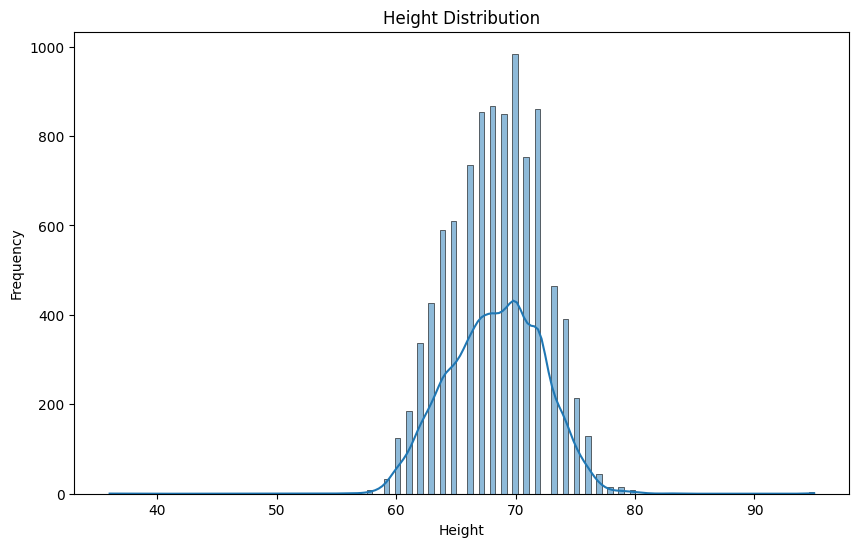

In [41]:
# plot height
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['height'], kde=True)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

## Income

* numeric 

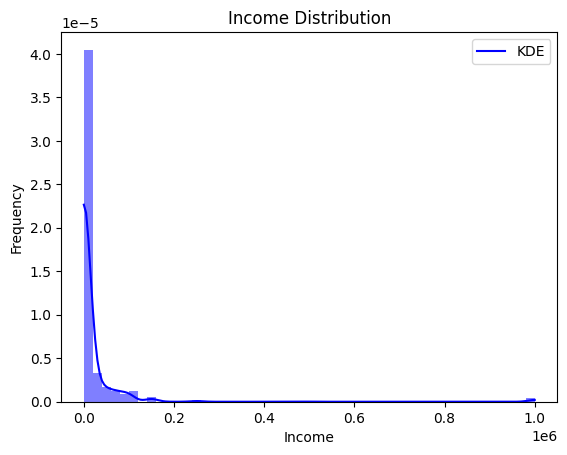

In [42]:
#kde plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['income'], kde=True, bins=50, color='blue', alpha=0.5, linewidth=0, fill=True, stat='density')
plt.legend(['KDE'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()


In [43]:
df.income.describe()

count       9514.000000
mean       18887.145155
std        91428.807808
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [44]:
df.income.value_counts(normalize=True), df.income.isnull().sum(), df.income.unique()

(income
 -1.0          0.809439
  20000.0      0.048455
  100000.0     0.025541
  80000.0      0.018604
  50000.0      0.018499
  30000.0      0.017028
  40000.0      0.016397
  60000.0      0.012928
  150000.0     0.011457
  70000.0      0.010721
  1000000.0    0.007568
  250000.0     0.002838
  500000.0     0.000526
 Name: proportion, dtype: float64,
 0,
 array([-1.0e+00,  8.0e+04,  2.0e+04,  4.0e+04,  3.0e+04,  5.0e+04,
         6.0e+04,  1.0e+06,  1.5e+05,  1.0e+05,  5.0e+05,  7.0e+04,
         2.5e+05]))

In [45]:
df["income"] = df["income"].replace({-1.0e+00: 0, 8.0e+04: 80000, 2.0e+04: 20000, 4.0e+04: 40000, 3.0e+04: 30000, 5.0e+04: 50000, 6.0e+04: 60000, 1.0e+06: 1000000, 1.5e+05: 150000, 1.0e+05: 100000, 5.0e+05: 500000, 7.0e+04: 70000, 2.5e+05: 250000})

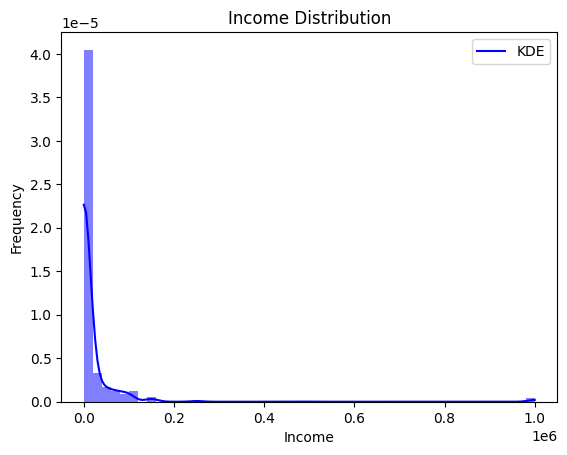

In [46]:
sns.histplot(df['income'], kde=True, bins=50, color='blue', alpha=0.5, linewidth=0, fill=True, stat='density')
plt.legend(['KDE'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

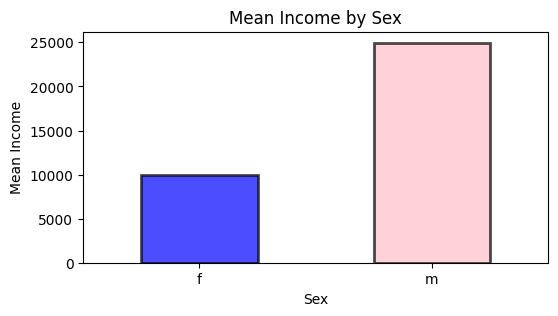

In [47]:
# Group by sex and calculate mean income
mean_income_by_sex = df.groupby('sex')['income'].mean()

# Plot the mean income by sex
mean_income_by_sex.plot(kind='bar', color=['blue', 'pink'], alpha=0.7, edgecolor='black', linewidth=2, figsize=(6, 3), rot=0, width=0.5)
plt.xlabel('Sex')
plt.ylabel('Mean Income')
plt.title('Mean Income by Sex')
plt.xticks(rotation=0)
plt.show()

In [48]:
df.income.value_counts(normalize=True), df.income.isnull().sum(), df.income.unique()

(income
 0.0          0.809439
 20000.0      0.048455
 100000.0     0.025541
 80000.0      0.018604
 50000.0      0.018499
 30000.0      0.017028
 40000.0      0.016397
 60000.0      0.012928
 150000.0     0.011457
 70000.0      0.010721
 1000000.0    0.007568
 250000.0     0.002838
 500000.0     0.000526
 Name: proportion, dtype: float64,
 0,
 array([      0.,   80000.,   20000.,   40000.,   30000.,   50000.,
          60000., 1000000.,  150000.,  100000.,  500000.,   70000.,
         250000.]))

In [49]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
5978,29.0,average,Anything,2,0,Graduated,62.0,0.0,sales / marketing / biz dev,2011-11-23-09-40,"san francisco, california",straight,likes dogs,atheism,f,aries and it&rsquo;s fun to think about,no,"english, spanish",single,0,3


## Job

In [50]:
df.job.value_counts(normalize=True), df.job.isnull().sum(), df.job.unique() 

(job
 other                                0.138217
 student                              0.099958
 science / tech / engineering         0.095438
 sales / marketing / biz dev          0.090183
 artistic / musical / writer          0.086925
 computer / hardware / software       0.085348
 medicine / health                    0.074732
 education / academia                 0.065377
 executive / management               0.044986
 banking / financial / real estate    0.043725
 entertainment / media                0.043515
 hospitality / travel                 0.027749
 law / legal services                 0.025646
 construction / craftsmanship         0.021863
 clerical / administrative            0.013664
 political / government               0.013139
 rather not say                       0.007988
 transportation                       0.007568
 unemployed                           0.006201
 retired                              0.004309
 military                             0.003469
 Name: p

In [51]:
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other'})

In [52]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
231,50.0,thin,Anything,2,0,Graduated,66.0,0.0,Sales,2012-06-29-20-35,"fremont, california",straight,likes dogs,christianity,f,leo,no,"english (fluently), spanish (fluently)",single,1,3


## Last online

* Unnecessary

In [53]:
del df["last_online"]

## Location (use city column)

In [54]:
df.location.value_counts(normalize=True), df.location.isnull().sum(), df.location.unique()  

(location
 san francisco, california    0.508198
 oakland, california          0.124133
 berkeley, california         0.080723
 san mateo, california        0.021757
 palo alto, california        0.017868
                                ...   
 boulder, colorado            0.000105
 san geronimo, california     0.000105
 petaluma, california         0.000105
 santa cruz, california       0.000105
 madrid, spain                0.000105
 Name: proportion, Length: 89, dtype: float64,
 0,
 array(['south san francisco, california', 'oakland, california',
        'san francisco, california', 'berkeley, california',
        'belvedere tiburon, california', 'san mateo, california',
        'daly city, california', 'san leandro, california',
        'atherton, california', 'san rafael, california',
        'walnut creek, california', 'menlo park, california',
        'belmont, california', 'san jose, california',
        'palo alto, california', 'emeryville, california',
        'el granada, ca

In [55]:
# Extract the city from the 'location' column
df['city'] = df['location'].apply(lambda x: x.split(',')[0])


In [56]:
df.city.value_counts(normalize=False).tail(50)

city
orinda               19
fairfax              18
pinole               18
belvedere tiburon    17
hercules             16
corte madera         14
moraga               13
half moon bay        12
fremont              11
green brae           11
atherton             10
larkspur              9
brisbane              9
crockett              8
foster city           7
ross                  4
montara               3
rodeo                 3
east palo alto        2
west oakland          2
portland              2
point richmond        2
kentfield             2
sacramento            2
san jose              2
bolinas               2
el granada            2
milwaukee             1
glencove              1
billings              1
tiburon               1
honolulu              1
tucson                1
canyon country        1
san diego             1
woodbridge            1
woodside              1
rohnert park          1
riverside             1
westlake              1
woodacre              1
hacienda he

In [57]:
df.location.str.split(',')[0]

['south san francisco', ' california']

In [58]:
threshold = 10
value_counts = df['city'].value_counts()
rare_categories = value_counts[value_counts < threshold].index
df['city'].replace(rare_categories, 'other', inplace=True)

In [59]:
df.city.value_counts(normalize=False), df.city.isnull().sum(), df.city.unique()  

(city
 san francisco          4835
 oakland                1181
 berkeley                768
 san mateo               207
 palo alto               170
 alameda                 155
 san rafael              134
 emeryville              117
 redwood city            115
 hayward                 112
 walnut creek            112
 menlo park               97
 daly city                95
 san leandro              94
 vallejo                  90
 other                    84
 richmond                 67
 el cerrito               64
 burlingame               63
 novato                   59
 mountain view            56
 stanford                 53
 south san francisco      53
 pleasant hill            53
 castro valley            51
 pacifica                 48
 san carlos               45
 martinez                 43
 mill valley              39
 san bruno                39
 belmont                  38
 albany                   32
 sausalito                27
 san anselmo              25
 benicia

In [60]:
del df["city"] # unnecessary

In [61]:
del df["location"]


In [62]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,pets,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness
1152,28.0,average,Anything,2,0,Graduated,71.0,0.0,Technology,straight,likes cats,buddhism,m,gemini but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), french...",single,0,3


## Orientation

In [63]:
df.orientation.value_counts(normalize=True), df.orientation.isnull().sum(), df.orientation.unique()

(orientation
 straight    0.860942
 gay         0.094282
 bisexual    0.044776
 Name: proportion, dtype: float64,
 0,
 array(['straight', 'bisexual', 'gay'], dtype=object))

In [64]:
df['orientation'] = df['orientation'].replace({ "straight":0 , "gay":1, "bisexual":2})

## Pets 

* has animal, likes animal , dislikes animal columns are created

In [65]:
df.pets.value_counts(normalize=True), df.pets.isnull().sum(), df.pets.unique()

(pets
 likes dogs and likes cats          0.362203
 likes dogs                         0.179840
 likes dogs and has cats            0.107316
 has dogs                           0.106054
 has dogs and likes cats            0.059491
 likes dogs and dislikes cats       0.046668
 has dogs and has cats              0.037524
 has cats                           0.035632
 likes cats                         0.032899
 has dogs and dislikes cats         0.013769
 dislikes dogs and dislikes cats    0.006727
 dislikes dogs and likes cats       0.005991
 dislikes cats                      0.003153
 dislikes dogs and has cats         0.002207
 dislikes dogs                      0.000526
 Name: proportion, dtype: float64,
 0,
 array(['likes dogs and likes cats', 'has cats', 'likes cats',
        'likes dogs', 'has dogs and likes cats', 'likes dogs and has cats',
        'likes dogs and dislikes cats', 'has dogs',
        'has dogs and dislikes cats', 'dislikes dogs and dislikes cats',
        'has dog

In [66]:
df["has animal"] = df["pets"].str.contains("has", na=False).astype(int)
df["likes animal"] = df["pets"].str.contains("likes", na=False).astype(int)
df["dislikes animal"] = df["pets"].str.contains("dislikes", na=False).astype(int)

In [67]:
del df["pets"]

In [68]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness,has animal,likes animal,dislikes animal
557,35.0,thin,Anything,2,0,Graduated,62.0,0.0,Sales,0,christianity,f,leo,no,english,single,0,3,0,1,0


## Sex 

* onehot or ordinal

In [69]:
#ordinal encoding 
df.replace(['m', 'f'], [0, 1], inplace=True)
df.sex.value_counts(normalize=True), df.sex.isnull().sum()

(sex
 0    0.596489
 1    0.403511
 Name: proportion, dtype: float64,
 0)

In [70]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness,has animal,likes animal,dislikes animal
7908,30.0,fit,Anything,0,0,Graduated,76.0,250000.0,Management,0,other,0,capricorn,no,"english, spanish, german",single,0,3,0,1,0


## Sign

In [71]:
df.sign.value_counts(normalize=True), df.sign.isnull().sum(), df.sign.unique()

(sign
 taurus and it&rsquo;s fun to think about         0.036052
 gemini and it&rsquo;s fun to think about         0.034265
 leo and it&rsquo;s fun to think about            0.033740
 pisces and it&rsquo;s fun to think about         0.033214
 scorpio and it&rsquo;s fun to think about        0.033109
 aries and it&rsquo;s fun to think about          0.033109
 libra and it&rsquo;s fun to think about          0.032794
 cancer and it&rsquo;s fun to think about         0.032794
 virgo and it&rsquo;s fun to think about          0.032689
 aries but it doesn&rsquo;t matter                0.031953
 aquarius but it doesn&rsquo;t matter             0.031743
 leo but it doesn&rsquo;t matter                  0.031322
 aquarius and it&rsquo;s fun to think about       0.030587
 virgo but it doesn&rsquo;t matter                0.030376
 sagittarius and it&rsquo;s fun to think about    0.030166
 cancer but it doesn&rsquo;t matter               0.029956
 taurus but it doesn&rsquo;t matter               

In [72]:
df['sign'] = df['sign'].str.replace('doesn&rsquo;t', "doesn't")
df['sign'] = df['sign'].str.replace('it&rsquo;s', "it's")


In [73]:
# sign_seriousness feature is created
def get_seriousness(sign):
    if "doesn't matter" in sign:
        return 0
    elif "fun to think about" in sign:
        return 2
    elif "matters a lot" in sign:
        return 3
    else:
        return 2

df['sign_seriousness'] = df['sign'].apply(get_seriousness)

In [74]:
sign_names = ['scorpio', 'capricorn', 'pisces', 'virgo', 'cancer', 'aries', 'gemini', 'libra', 'sagittarius', 'leo', 'taurus', 'aquarius']
# extract sign_names
def extract_sign(x):
    for sign in sign_names:
        if x.startswith(sign):
            return sign
    return x

df['sign'] = df['sign'].apply(extract_sign)
df.sign.value_counts(normalize=True), df.sign.isnull().sum(), df.sign.unique()

(sign
 leo            0.089973
 cancer         0.087450
 aries          0.086819
 taurus         0.086609
 gemini         0.085663
 aquarius       0.085663
 virgo          0.085558
 libra          0.084507
 scorpio        0.082825
 pisces         0.080933
 sagittarius    0.077044
 capricorn      0.066954
 Name: proportion, dtype: float64,
 0,
 array(['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo',
        'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'capricorn'],
       dtype=object))

In [75]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness,has animal,likes animal,dislikes animal,sign_seriousness
7066,21.0,thin,Anything,2,0,Graduated,70.0,0.0,Other,1,atheism,0,taurus,no,english (fluently),single,0,3,0,1,0,2


In [76]:
df.shape    

(9514, 22)

## Smokes

In [77]:
df.smokes.value_counts(normalize=True), df.smokes.isnull().sum(), df.smokes.unique()

(smokes
 no                0.817532
 sometimes         0.064536
 when drinking     0.055077
 yes               0.035632
 trying to quit    0.027223
 Name: proportion, dtype: float64,
 0,
 array(['sometimes', 'no', 'when drinking', 'yes', 'trying to quit'],
       dtype=object))

In [78]:
df.replace({'smokes': {'no': 0, 'sometimes': 1, 'when drinking': 1, 'yes': 1, 'trying to quit': 1}}, inplace=True)
df.smokes.value_counts(normalize=True), df.smokes.isnull().sum(), df.smokes.unique()

(smokes
 0    0.817532
 1    0.182468
 Name: proportion, dtype: float64,
 0,
 array([1, 0], dtype=int64))

In [79]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,religion,sex,sign,smokes,speaks,status,kid,religion_seriousness,has animal,likes animal,dislikes animal,sign_seriousness
1224,25.0,fit,Anything,1,0,Graduated,72.0,1000000.0,Management,0,atheism,0,scorpio,0,"english, spanish, italian",single,0,3,1,1,0,2


## Speaks (nothing to do)

In [80]:
df.speaks.value_counts() , df.speaks.isnull().sum(), df.speaks.unique()

(speaks
 english                                                                                3417
 english (fluently)                                                                     1108
 english (fluently), spanish (okay)                                                      322
 english (fluently), spanish (poorly)                                                    321
 english (fluently), spanish (fluently)                                                  195
                                                                                        ... 
 english (fluently), hindi (fluently), spanish (okay)                                      1
 english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
 english (fluently), spanish (fluently), portuguese                                        1
 english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
 english (fluently), french (okay), swedish (poorly)          

In [81]:
df["eng"] = df["speaks"].str.contains("english", na=False).astype(int)
df["spanish"] = df["speaks"].str.contains("spanish", na=False).astype(int)
df["french"] = df["speaks"].str.contains("french", na=False).astype(int)
df["german"] = df["speaks"].str.contains("german", na=False).astype(int)
df["russian"] = df["speaks"].str.contains("russian", na=False).astype(int)
df["italian"] = df["speaks"].str.contains("italian", na=False).astype(int)
df["portuguese"] = df["speaks"].str.contains("portuguese", na=False).astype(int)
df["chinese"] = df["speaks"].str.contains("chinese", na=False).astype(int)
df["japanese"] = df["speaks"].str.contains("japanese", na=False).astype(int)
df["korean"] = df["speaks"].str.contains("korean", na=False).astype(int)
df["arabic"] = df["speaks"].str.contains("arabic", na=False).astype(int)
df["hindi"] = df["speaks"].str.contains("hindi", na=False).astype(int)


In [82]:
del df["speaks"]

## Status

In [83]:
df.status.value_counts(normalize=True), df.status.isnull().sum(), df.status.unique()

(status
 single            0.936410
 seeing someone    0.030376
 available         0.028379
 married           0.004835
 Name: proportion, dtype: float64,
 0,
 array(['single', 'available', 'seeing someone', 'married'], dtype=object))

-------------

## Generation

In [84]:
df['age']=df['age'].astype(int)

generation = []
for i in range(len(df)):
    if 17 < int(df["age"].iloc[i]) < 33:
        generation.append(1)
    elif 32 < int(df["age"].iloc[i]) < 48:
        generation.append(2)
    else:
        generation.append(3)
df["generation"] = generation

In [85]:
df.generation.value_counts(normalize=True), df.generation.isnull().sum(), df.generation.unique()

(generation
 1    0.635590
 2    0.286000
 3    0.078411
 Name: proportion, dtype: float64,
 0,
 array([1, 2, 3], dtype=int64))

------------

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   9514 non-null   int32  
 1   body_type             9514 non-null   object 
 2   diet                  9514 non-null   object 
 3   drinks                9514 non-null   int64  
 4   drugs                 9514 non-null   int64  
 5   education             9514 non-null   object 
 6   height                9514 non-null   float64
 7   income                9514 non-null   float64
 8   job                   9514 non-null   object 
 9   orientation           9514 non-null   int64  
 10  religion              9514 non-null   object 
 11  sex                   9514 non-null   int64  
 12  sign                  9514 non-null   object 
 13  smokes                9514 non-null   int64  
 14  status                9514 non-null   object 
 15  kid                  

In [87]:
df.sample()

,age,body_type,diet,drinks,drugs,education,height,income,job,orientation,religion,sex,sign,smokes,status,kid,religion_seriousness,has animal,likes animal,dislikes animal,sign_seriousness,eng,spanish,french,german,russian,italian,portuguese,chinese,japanese,korean,arabic,hindi,generation
3781,27,fit,Anything,1,0,Graduated,69.0,0.0,Technology,1,atheism,0,gemini,0,single,0,3,0,1,0,2,1,0,0,0,1,0,0,0,0,0,0,0,1


# ML

## Can your profile predict your age?

In [88]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'orientation', 'religion', 'sex', 'sign', 'smokes',
       'status', 'kid', 'religion_seriousness', 'has animal', 'likes animal',
       'dislikes animal', 'sign_seriousness', 'eng', 'spanish', 'french',
       'german', 'russian', 'italian', 'portuguese', 'chinese', 'japanese',
       'korean', 'arabic', 'hindi', 'generation'],
      dtype='object')

In [89]:
object_columns = df.select_dtypes(include=['object']).columns
df_age = pd.get_dummies(df, columns=object_columns, drop_first=True)
object_columns 

Index(['body_type', 'diet', 'education', 'job', 'religion', 'sign', 'status'], dtype='object')

In [90]:
df_age.shape

(9514, 74)

In [91]:
X = df_age.drop(['age'], axis=1)
y = df_age['age']

In [92]:
# algo_test(X,y)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# fit with gradient boosting regressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
p = model.predict(x_test)

print('R2 Score:', r2_score(y_test, p))
print('RMSE:', mean_squared_error(y_test, p) ** 0.5)
print('MAE:', mean_absolute_error(y_test, p))

R2 Score: 0.8574586483407863
RMSE: 3.599286685721211
MAE: 2.929409159055913


## Can your profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)

In [94]:
import pandas as pd
import numpy as np
import warnings
from tabulate import tabulate  # Tabulate kütüphanesini import et

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(x, y):
    # Bütün modelleri tanımlıyorum
    log_reg = LogisticRegression()
    knn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gbdt = GradientBoostingClassifier()
    svc = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    mlp = MLPClassifier()

    algos = [log_reg, knn, rf, ada, gbdt, svc, nb, dt, mlp]
    algo_names = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 
                   'SVC', 'Naive Bayes', 'Decision Tree', 'MLP']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=algo_names)
    
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        precision.append(precision_score(y_test, p, average='weighted'))
        recall.append(recall_score(y_test, p, average='weighted'))
        f1.append(f1_score(y_test, p, average='weighted'))
        
    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1 Score'] = f1
    
    # Oluşturduğum result tablosunu doğruluk oranına (accuracy) göre sıralayıp dönüyor
    rtable = result.sort_values('Accuracy', ascending=False)
    
    # Tabloyu daha güzel bir formatta yazdırmak için tabulate kullan
    print(tabulate(rtable, headers='keys', tablefmt='psql'))
    return rtable


In [95]:
# generation guess
df_gen= pd.get_dummies(df, columns=object_columns, drop_first=True)
x = df_gen.drop(['generation',"age"], axis=1)
y = df_gen['generation']
algo_test_classification(x, y)

+---------------------+------------+-------------+----------+------------+
|                     |   Accuracy |   Precision |   Recall |   F1 Score |
|---------------------+------------+-------------+----------+------------|
| Gradient Boosting   |   0.682081 |    0.637325 | 0.682081 |   0.621021 |
| AdaBoost            |   0.677877 |    0.632497 | 0.677877 |   0.62721  |
| Random Forest       |   0.666842 |    0.617445 | 0.666842 |   0.616259 |
| Logistic Regression |   0.656858 |    0.560855 | 0.656858 |   0.582086 |
| MLP                 |   0.647924 |    0.622815 | 0.647924 |   0.610162 |
| SVC                 |   0.647399 |    0.606431 | 0.647399 |   0.518839 |
| Naive Bayes         |   0.642144 |    0.412349 | 0.642144 |   0.502208 |
| KNN                 |   0.61114  |    0.563703 | 0.61114  |   0.567609 |
| Decision Tree       |   0.553862 |    0.563354 | 0.553862 |   0.558202 |
+---------------------+------------+-------------+----------+------------+


,Accuracy,Precision,Recall,F1 Score
Gradient Boosting,0.682081,0.637325,0.682081,0.621021
AdaBoost,0.677877,0.632497,0.677877,0.627210
Random Forest,0.666842,0.617445,0.666842,0.616259
Logistic Regression,0.656858,0.560855,0.656858,0.582086
MLP,0.647924,0.622815,0.647924,0.610162
SVC,0.647399,0.606431,0.647399,0.518839
Naive Bayes,0.642144,0.412349,0.642144,0.502208
KNN,0.611140,0.563703,0.611140,0.567609
Decision Tree,0.553862,0.563354,0.553862,0.558202


# Conclusion

In this project, we successfully implemented and evaluated various classification and regression models to predict the generation and other target variables. The results demonstrated the effectiveness of different algorithms, with some models outperforming others in terms of accuracy and R-squared values. Future work could focus on further optimizing these models and exploring additional features to improve predictive performance.